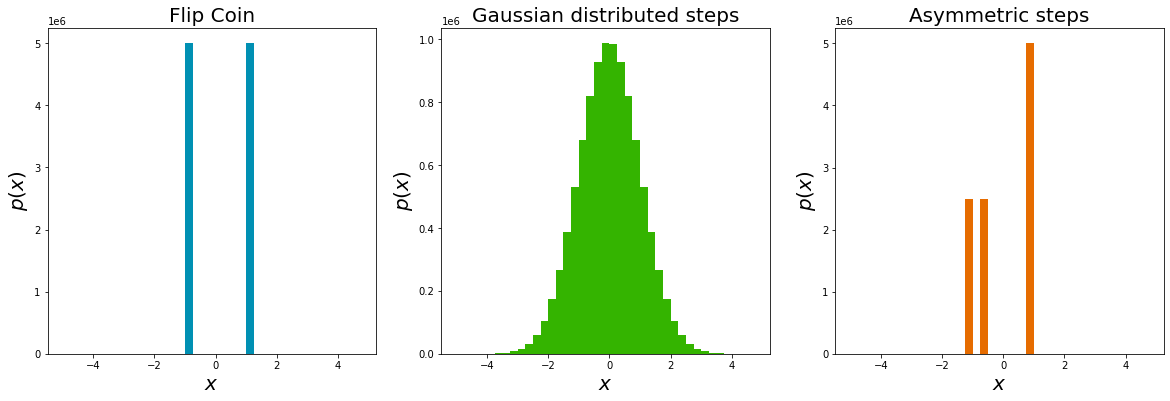

In [2]:
import numpy as np 
from matplotlib import pyplot as plt 

cases = ['Flip Coin', 'Gaussian distributed steps', 'Asymmetric steps']
N = 1000                                                                       # Number of steps
n = 10000                                                                       # Number of copies
r1 = np.random.choice([-1,1], size=(N,n))                                       # Random steps with a coin flip
r2 = np.random.randn(N,n)                                                       # Random steps with a Gaussian distribution 
r3 = np.random.choice(np.sqrt(1.5)*np.array([-1, -0.6, 0.8, 0.8]), size=(N,n))  # Random steps (25% -1, 25% -0.6 and 50%0.8)
C = ['#0090B3','#34B400','#E66C00']


plt.figure(figsize=(20,6))
l = np.arange(40)/4 - 5
for subplot, sequences in zip([1,2,3], [r1,r2,r3]):    
    plt.subplot(1,3,subplot)
    plt.hist(sequences.reshape(sequences.size,),l,color=C[subplot-1])
    plt.xlabel(r"$x$",fontsize=20)
    plt.ylabel(r"$p(x)$",fontsize=20)
    plt.title(cases[subplot-1], fontsize=20)

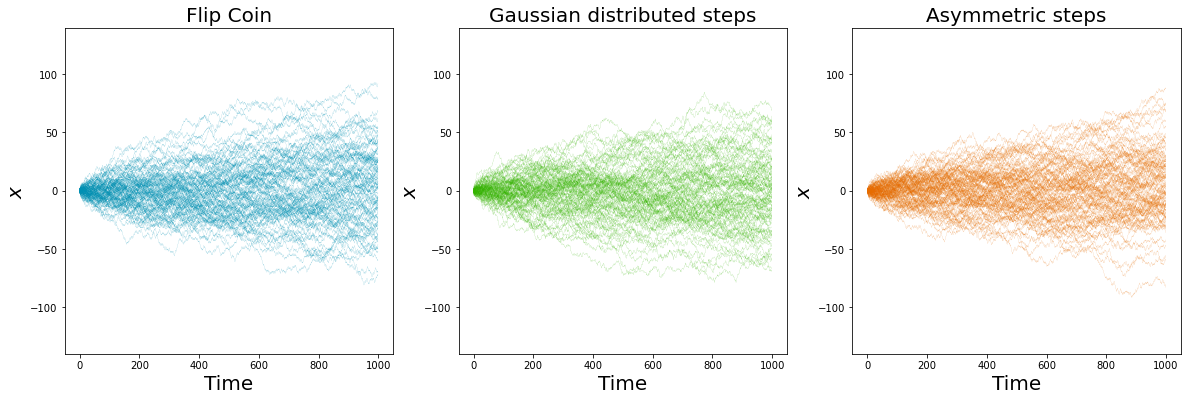

In [246]:
x = [np.cumsum(r1,axis=0),np.cumsum(r2,axis=0),np.cumsum(r3,axis=0)]          # Computing trajectories from random numbers
plt.figure(figsize=(20,6))

for subplot,trajectories in zip([1,2,3],x):
    plt.subplot(1,3,subplot)
    plt.plot(trajectories[:,:100],linewidth=0.1,color=C[subplot-1]) 
    plt.ylim([-140, 140])
    plt.xlabel(r"Time",fontsize=20)
    plt.ylabel('$x$',fontsize=20)
    plt.title(cases[subplot-1], fontsize=20)

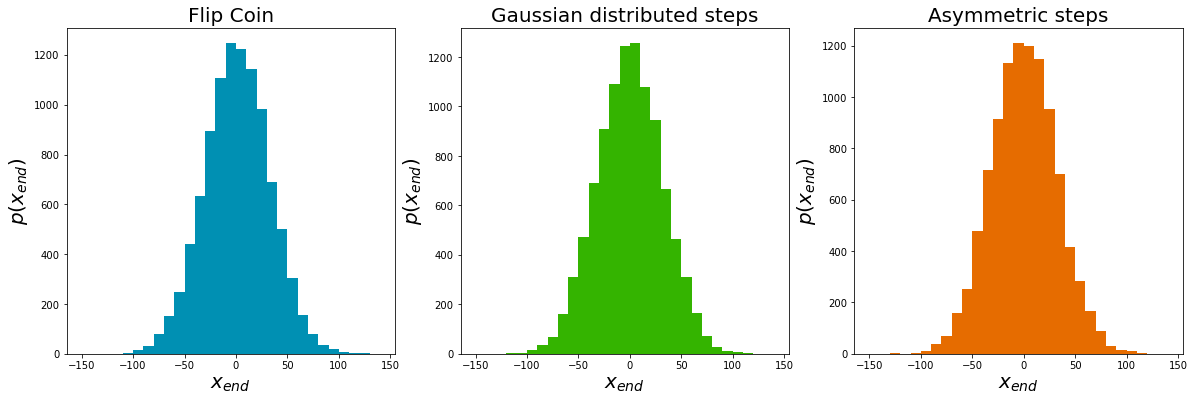

In [247]:
plt.figure(figsize=(20,6))

l = np.arange(-15,15)*10
for subplot,trajectories in zip([1,2,3],x):
    #h = np.histogram()[0]
    plt.subplot(1,3,subplot)
    plt.hist(trajectories[999,:],l,color=C[subplot-1])
    plt.xlabel(r"$x_{end}$",fontsize=20)
    plt.ylabel('$p(x_{end})$',fontsize=20)
    plt.title(cases[subplot-1], fontsize=20)

In [248]:
import scipy.io as sci
sci.savemat('Data_fig_randomwalks.mat',{'r1': r1, 'r2': r2, 'r3': r3})